In [2]:
library(tidyverse)
library(reshape2)
library(ggsci)
library(readxl) 
library(showtext)
showtext_auto(enable=T)
# library(ggplotify) 
library(tibble) 
# library(Hmisc)
# library(scales) #
# library(xlsx) #
library(patchwork) #
  
library(Seurat)
options(Seurat.object.assay.version = "v5")
library(GEOquery)


In [3]:
GSE = "GSE197023"

In [4]:
# load('/blue/mateescu/lihe.liu/scRNA/intermData/GSE197023/0-metadata.rdata')
ls()

[1] "GSE"

In [5]:
# create object
raw_path = data.frame(
  path = list.files( "/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023", full.names = T ),
  id = c( "GSM5907077", "GSM5907084", "GSM5907078", "GSM5907085", "GSM5907079", "GSM5907086" ),
  sample = c( "AD_1_LS", "AD_1_NL", "AD_2_LS", "AD_2_NL", "AD_3_LS", "AD_3_NL" ),
  group = c("LS", "NL", "LS", "NL", "LS", "NL")
)
raw_path


path,id,sample,group
<chr>,<chr>,<chr>,<chr>
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_1_LS,GSM5907077,AD_1_LS,LS
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_1_NL,GSM5907084,AD_1_NL,NL
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_2_LS,GSM5907078,AD_2_LS,LS
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_2_NL,GSM5907085,AD_2_NL,NL
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_3_LS,GSM5907079,AD_3_LS,LS
/blue/mateescu/lihe.liu/scRNA/rawData/GSE197023/AD_3_NL,GSM5907086,AD_3_NL,NL


In [7]:
scdata_ls = lapply( c(1:6), function(xx){ #
  # xx = 1 #
  dt_dir = raw_path[ xx, "path" ] #
  dt_id = raw_path[ xx, "id" ]
  dt_gp = raw_path[ xx, "group" ]
  dt_sp = raw_path[ xx, "sample" ]
  #
  xxx = Load10X_Spatial( dt_dir, 
                         assay = "spatial", 
                         slice = dt_sp )
  xxx$id = dt_id
  xxx$group = dt_gp
  xxx$sample = dt_sp
  return( xxx )
} )

# 获得一个 list
class(scdata_ls)
scdata_ls
sc_gse197023 = merge( scdata_ls[[1]], scdata_ls[2:6] )

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "list"

[[1]]
An object of class Seurat 
21587 features across 188 samples within 1 assay 
Active assay: spatial (21587 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: AD_1_LS

[[2]]
An object of class Seurat 
21587 features across 95 samples within 1 assay 
Active assay: spatial (21587 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: AD_1_NL

[[3]]
An object of class Seurat 
21587 features across 335 samples within 1 assay 
Active assay: spatial (21587 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: AD_2_LS

[[4]]
An object of class Seurat 
21587 features across 419 samples within 1 assay 
Active assay: spatial (21587 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: AD_2_NL

[[5]]
An object of class Seurat 
21587 features across 791 samples within 1 assay 
Active assay: spatial (21587 features, 0 variable features)
 1 layer prese

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [ ]:
# load('/blue/mateescu/lihe.liu/scRNA/intermData/GSE197023/3.1-gse197023_process.rda')

[1] "GSE"               "Info"              "meta"             
[4] "raw_path"          "sc_gse197023_int2"

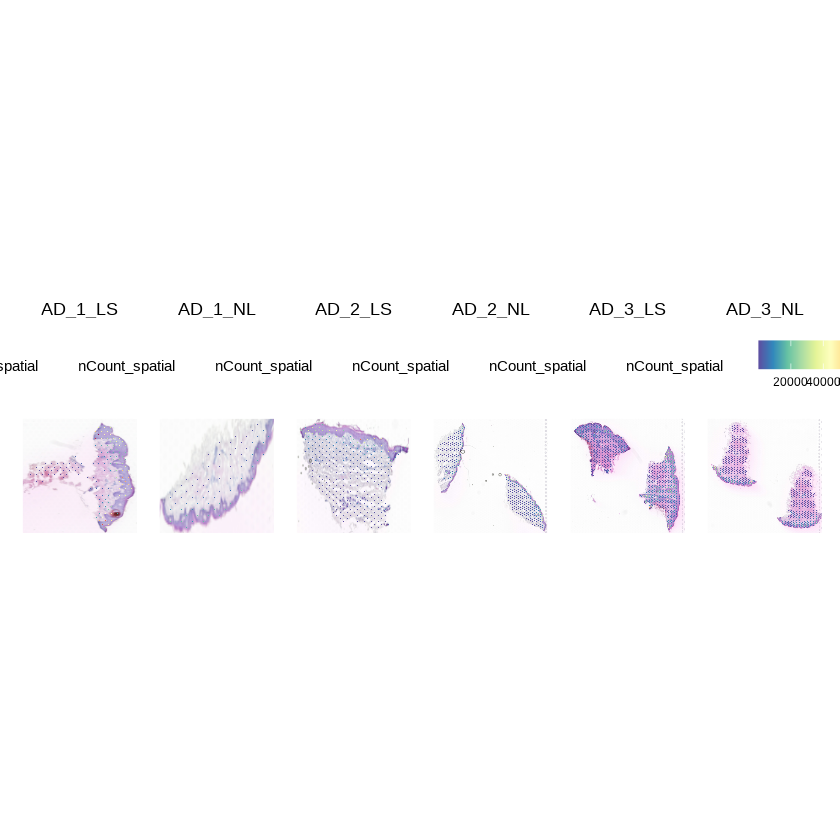

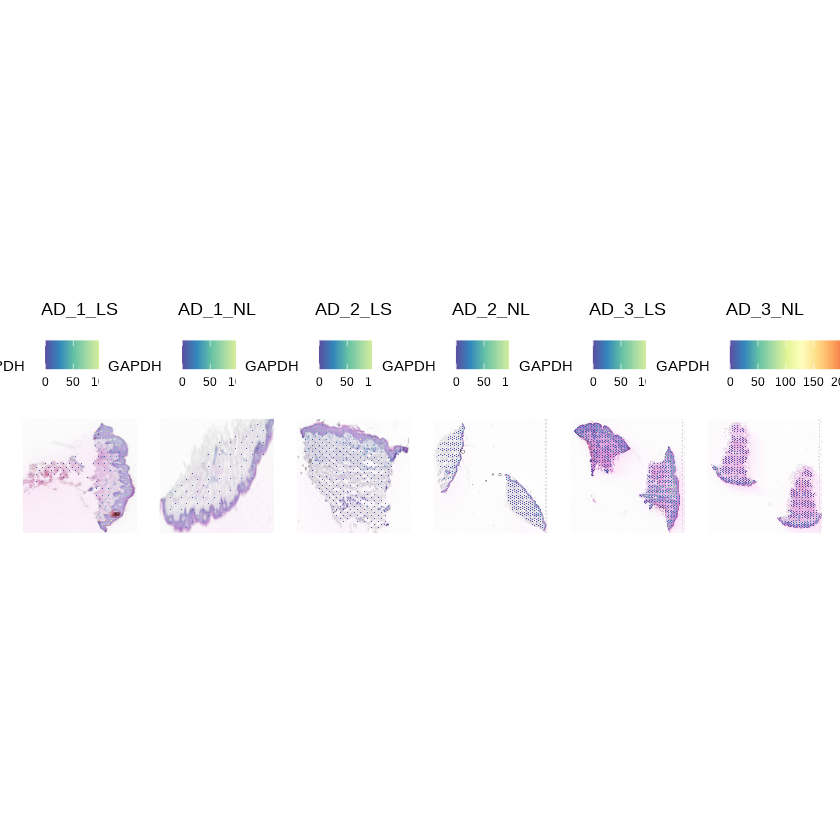

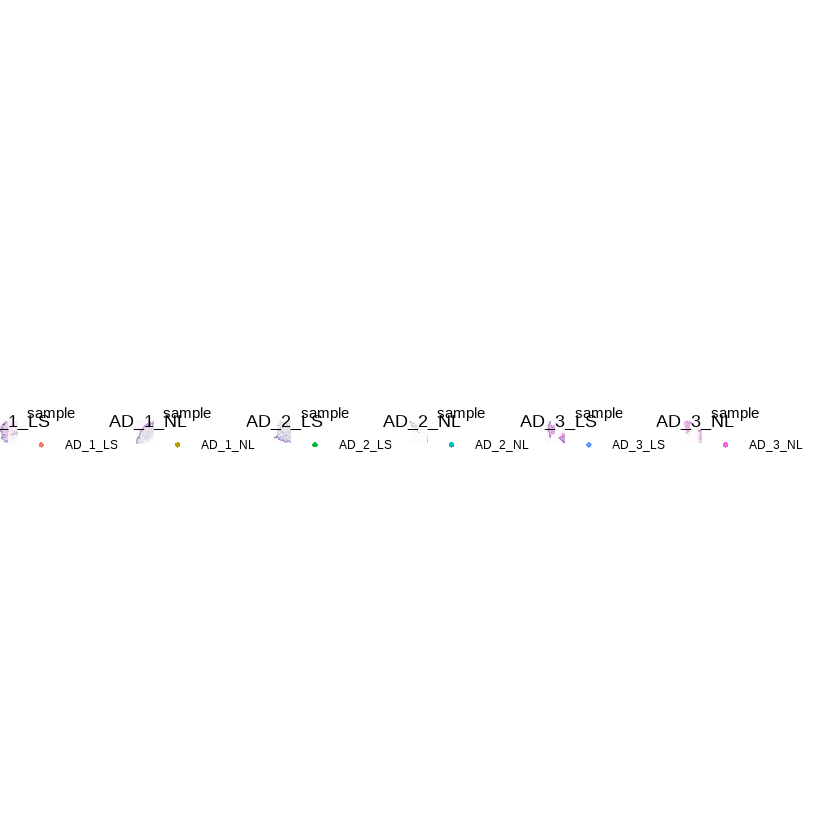

In [10]:
## visualization
# 
SpatialPlot(sc_gse197023, features = "nCount_spatial")
SpatialPlot(sc_gse197023, features = "GAPDH", slot = "counts" )
SpatialPlot(sc_gse197023, group.by = "sample" )
# 
# SpatialFeaturePlot( sc_gse197023, features = "GAPDH" ) 
# SpatialFeaturePlot( sc_gse197023, features = "GAPDH", slot = "counts" ) 
# SpatialFeaturePlot( sc_gse197023, features = "nCount_spatial" ) 


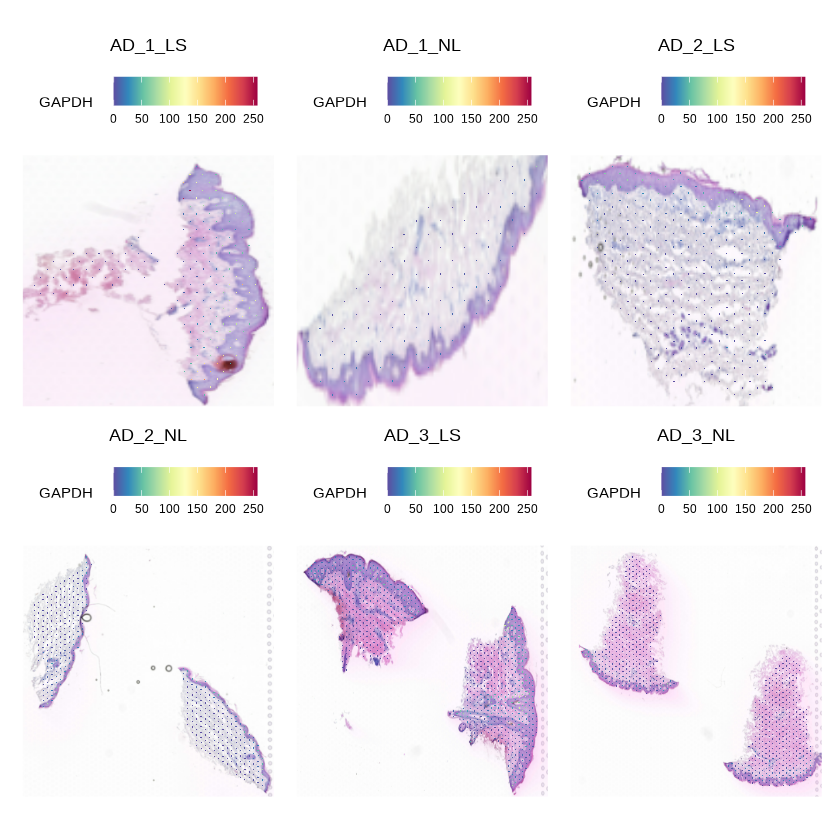

In [11]:
SpatialFeaturePlot( sc_gse197023, features = "GAPDH", 
                    slot = "counts",
                    crop = T, 
                    # images = c("AD_1_LS","AD_2_LS"), #
                    ncol = 3, #
                    pt.size.factor = 1, # 
                    image.alpha = 1, #
                    alpha = 1, # 
                    information = NULL ) #


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


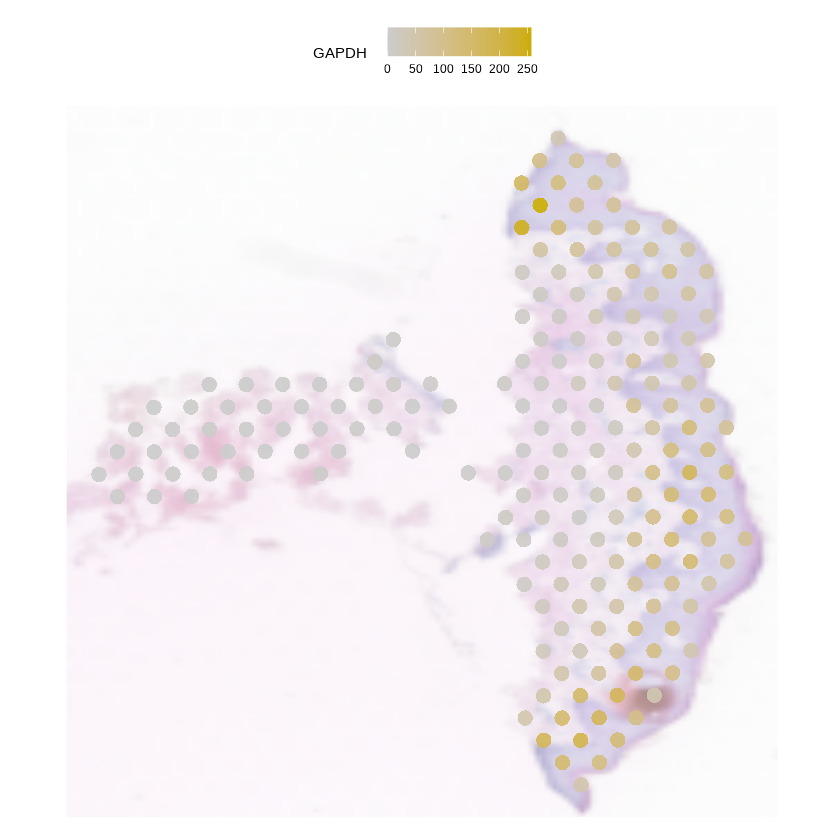

In [12]:
SpatialFeaturePlot( sc_gse197023, features = "GAPDH", 
                    slot = "counts",
                    crop = T, # 
                    images = c("AD_1_LS"), # 
                    # ncol = 3, 
                    pt.size.factor = 4, 
                    image.alpha = 0.5, 
                    alpha = 0.9, 
                    information = data.frame( sample = "xxx", info = "yyy" ) 
                    ) +
  scale_fill_gradient( low = "grey80", high = "gold3" ) #



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


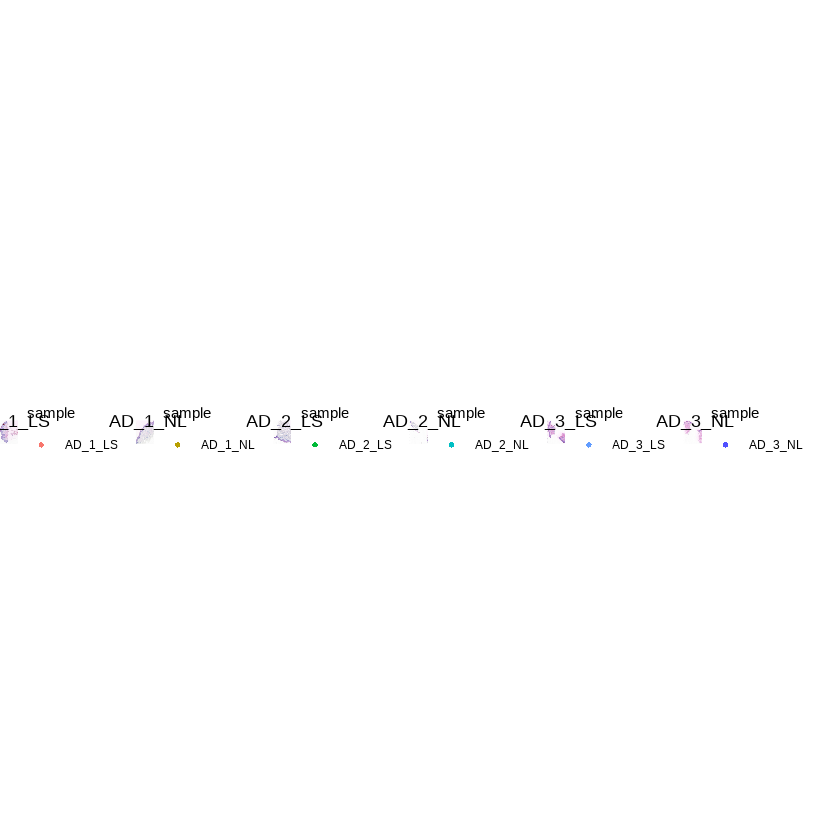

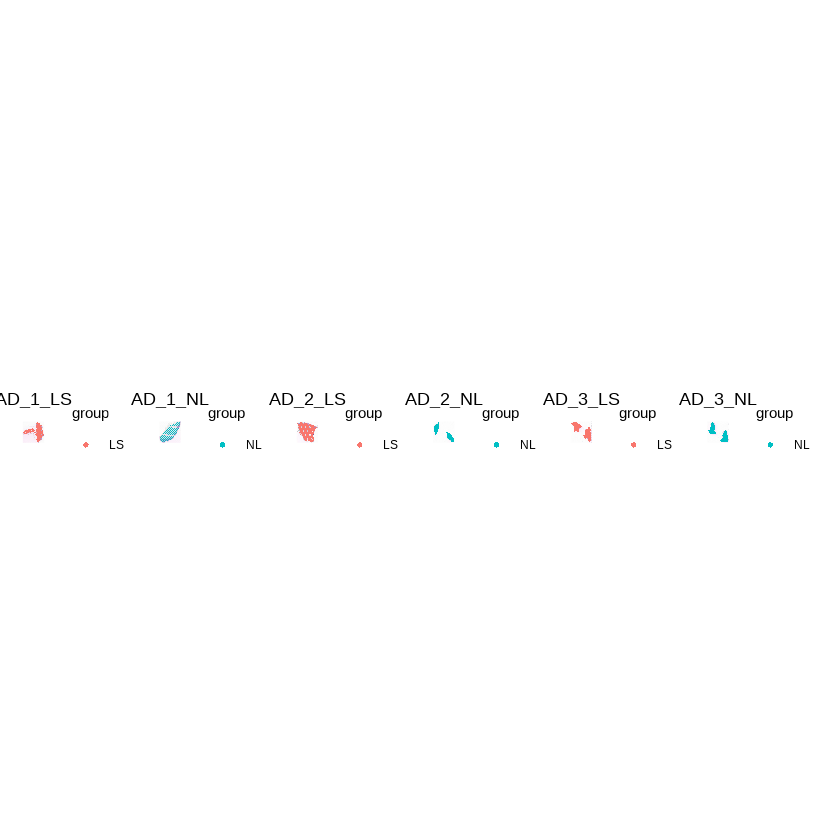

In [ ]:

# SpatialDimPlot
SpatialDimPlot(sc_gse197023, group.by = "sample") + # 
  # scale_fill_manual( values = c( "red", "blue", "green", "purple", "yellow", "orange" ) ) # 
  scale_fill_igv() #

SpatialDimPlot(sc_gse197023, group.by = "group") 

